# Pre-requisite

- Create the analysis environment using the `conda` and the shared `environment.txt` file
- Use the following command for the same 



```
conda create -n new analysis --file environment.txt
```


### Importing libraries for the analysis


In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline


### Reading in the data from the `previous_application.csv` source


In [4]:
previous_application=pd.read_csv("../data/raw/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### The shape of `previous_application` csv

In [4]:
previous_application.shape

(1670214, 37)

#### The columns in the `previous_application` csv


In [7]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)



#### General `info()` of the `preivous_application`



In [5]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### Using the `describe()` on the `previous_application` to get a general sense of numerical columns

In [6]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000



# Data cleaning and manipulation


#### Feature Distribution

In [4]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)

#### Categorical and Numerical features in `previous_application.csv`

In [5]:
type_features(previous_application)



categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


### Missing Value analysis for `previous_application.csv`
Here in the plots it is showing columns which have more than 40% null/missing values in the dataset 


In [2]:

# function to analys missing values in a dataset

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 40]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by Cloumns>40%', fontsize=15)
    return ms 



,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


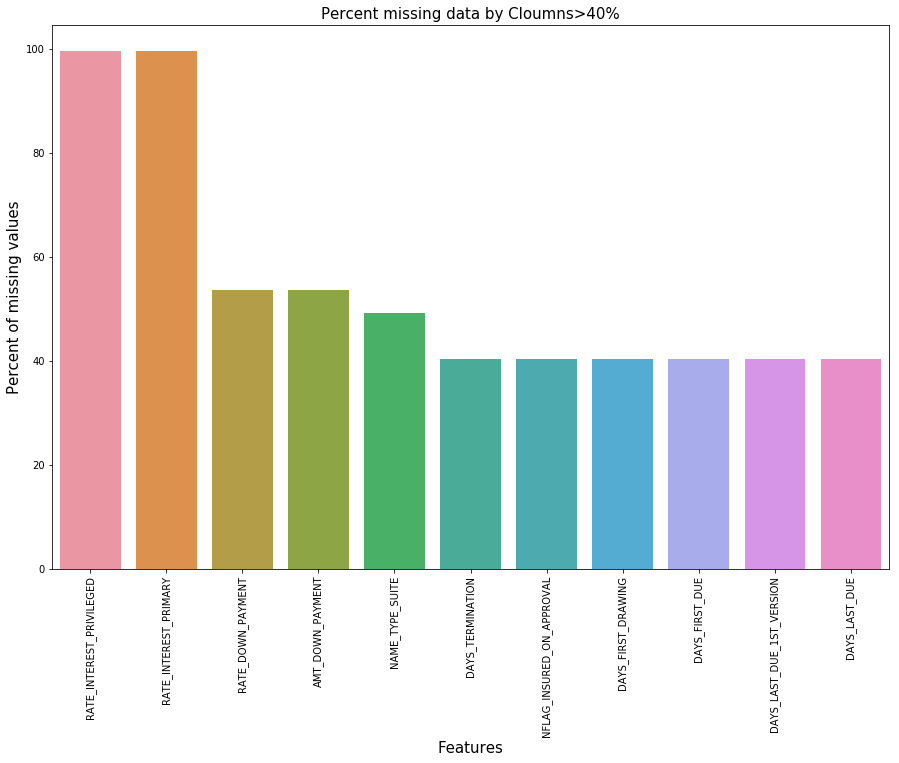

In [5]:

missingdata(previous_application)




#### Clearly we see that there are many columns which missing values


# Outlier Removal - IQR method



# `previous_application` 

#### Doing the IQR analysis to find the outliers in the dataset



In [9]:

previous_application_numerical_values = previous_application[previous_application.select_dtypes(exclude = ["object"]).columns]
previous_application_numerical_values.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1, inplace=True)
previous_application_numerical_values.head()



,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,NaN,NaN,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,NaN,NaN,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,NaN,NaN,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,NaN,NaN,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN,NaN


#### First quantile


In [10]:
Q1 = previous_application_numerical_values.quantile(0.25)
Q1


AMT_ANNUITY                    6321.780000
AMT_APPLICATION               18720.000000
AMT_CREDIT                    24160.500000
AMT_DOWN_PAYMENT                  0.000000
AMT_GOODS_PRICE               50841.000000
HOUR_APPR_PROCESS_START          10.000000
NFLAG_LAST_APPL_IN_DAY            1.000000
RATE_DOWN_PAYMENT                 0.000000
RATE_INTEREST_PRIMARY             0.160716
RATE_INTEREST_PRIVILEGED          0.715645
DAYS_DECISION                 -1300.000000
SELLERPLACE_AREA                 -1.000000
CNT_PAYMENT                       6.000000
DAYS_FIRST_DRAWING           365243.000000
DAYS_FIRST_DUE                -1628.000000
DAYS_LAST_DUE_1ST_VERSION     -1242.000000
DAYS_LAST_DUE                 -1314.000000
DAYS_TERMINATION              -1270.000000
NFLAG_INSURED_ON_APPROVAL         0.000000
Name: 0.25, dtype: float64

#### Third quantile


In [11]:
Q3 = previous_application_numerical_values.quantile(0.75)
Q3


AMT_ANNUITY                   20658.420000
AMT_APPLICATION              180360.000000
AMT_CREDIT                   216418.500000
AMT_DOWN_PAYMENT               7740.000000
AMT_GOODS_PRICE              234000.000000
HOUR_APPR_PROCESS_START          15.000000
NFLAG_LAST_APPL_IN_DAY            1.000000
RATE_DOWN_PAYMENT                 0.108909
RATE_INTEREST_PRIMARY             0.193330
RATE_INTEREST_PRIVILEGED          0.852537
DAYS_DECISION                  -280.000000
SELLERPLACE_AREA                 82.000000
CNT_PAYMENT                      24.000000
DAYS_FIRST_DRAWING           365243.000000
DAYS_FIRST_DUE                 -411.000000
DAYS_LAST_DUE_1ST_VERSION       129.000000
DAYS_LAST_DUE                   -74.000000
DAYS_TERMINATION                -44.000000
NFLAG_INSURED_ON_APPROVAL         1.000000
Name: 0.75, dtype: float64

#### Inter-quartile Range (IQR)


In [12]:
IQR = Q3 - Q1
IQR


AMT_ANNUITY                   14336.640000
AMT_APPLICATION              161640.000000
AMT_CREDIT                   192258.000000
AMT_DOWN_PAYMENT               7740.000000
AMT_GOODS_PRICE              183159.000000
HOUR_APPR_PROCESS_START           5.000000
NFLAG_LAST_APPL_IN_DAY            0.000000
RATE_DOWN_PAYMENT                 0.108909
RATE_INTEREST_PRIMARY             0.032614
RATE_INTEREST_PRIVILEGED          0.136892
DAYS_DECISION                  1020.000000
SELLERPLACE_AREA                 83.000000
CNT_PAYMENT                      18.000000
DAYS_FIRST_DRAWING                0.000000
DAYS_FIRST_DUE                 1217.000000
DAYS_LAST_DUE_1ST_VERSION      1371.000000
DAYS_LAST_DUE                  1240.000000
DAYS_TERMINATION               1226.000000
NFLAG_INSURED_ON_APPROVAL         1.000000
dtype: float64

In [14]:

z=(previous_application_numerical_values < (Q1 - 1.5 * IQR)) | (previous_application_numerical_values > (Q3 + 1.5 * IQR))
z.head()



,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Normalizing the `previous_application.csv` using the Quantile ranges via IQR method


In [15]:

previous_application_normalized = previous_application_numerical_values[~((previous_application_numerical_values < (Q1 - 1.5 * IQR)) |(previous_application_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
previous_application_normalized.head()


,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
4,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,NaN,NaN,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN,NaN
5,23703.930,315000.0,340573.5,NaN,315000.0,8,1,NaN,NaN,NaN,-684,-1,18.0,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,NaN,0.0,0.0,NaN,NaN,11,1,NaN,NaN,NaN,-14,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.0,0.0,NaN,NaN,7,1,NaN,NaN,NaN,-21,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### Shape of the normalized `previous_application.csv`


In [16]:

previous_application_normalized.shape




(972697, 19)


# Univariate analysis

### `previous_application.csv`



#### Now we see the distribution of `numerical features`


In [ ]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(previous_application.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(previous_application.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(previous_application.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')
sns.distplot(previous_application.AMT_DOWN_PAYMENT.dropna(), kde=True, ax=ax[1,1]).set_title('customer Down payment Amount Distribution')

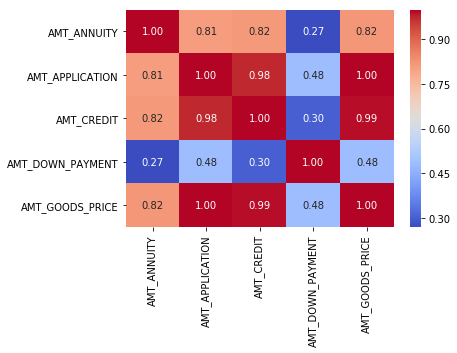

In [7]:
g = sns.heatmap(previous_application[['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'RATE_DOWN_PAYMENT')

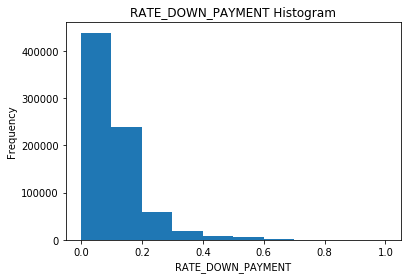

In [8]:
previous_application['RATE_DOWN_PAYMENT'].plot.hist(title = 'RATE_DOWN_PAYMENT Histogram');
plt.xlabel('RATE_DOWN_PAYMENT')

#'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'

Text(0.5, 0, 'RATE_INTEREST_PRIMARY')

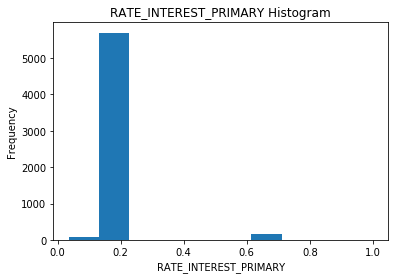

In [9]:
previous_application['RATE_INTEREST_PRIMARY'].plot.hist(title = 'RATE_INTEREST_PRIMARY Histogram');
plt.xlabel('RATE_INTEREST_PRIMARY')

#outlier present

Text(0.5, 0, 'RATE_INTEREST_PRIVILEGED')

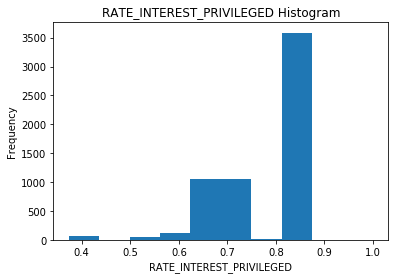

In [10]:
previous_application['RATE_INTEREST_PRIVILEGED'].plot.hist(title = 'RATE_INTEREST_PRIVILEGED Histogram');
plt.xlabel('RATE_INTEREST_PRIVILEGED')

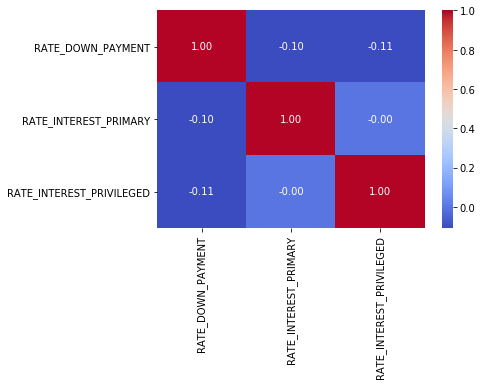

In [11]:
g = sns.heatmap(previous_application[['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'DAYS_DECISION')

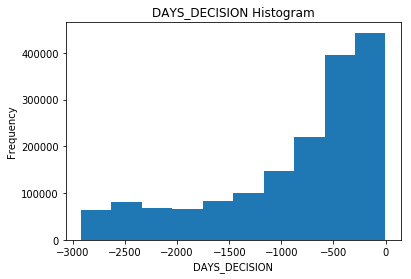

In [12]:
previous_application['DAYS_DECISION'].plot.hist(title = 'DAYS_DECISION Histogram');
plt.xlabel('DAYS_DECISION')





Text(0.5, 0, 'SELLERPLACE_AREA')

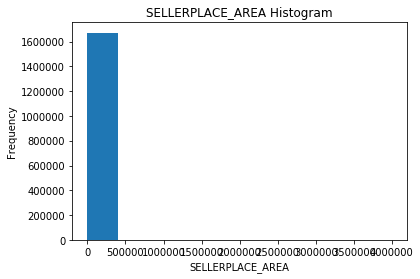

In [13]:
previous_application['SELLERPLACE_AREA'].plot.hist(title = 'SELLERPLACE_AREA Histogram');
plt.xlabel('SELLERPLACE_AREA')


Text(0.5, 0, 'CNT_PAYMENT')

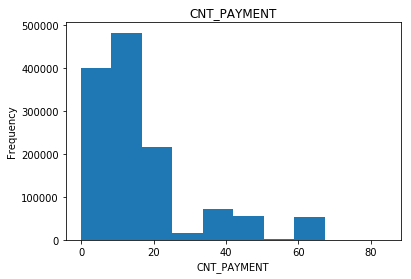

In [14]:
previous_application['CNT_PAYMENT'].plot.hist(title = 'CNT_PAYMENT');
plt.xlabel('CNT_PAYMENT')

Text(0.5, 0, 'DAYS_FIRST_DRAWING')

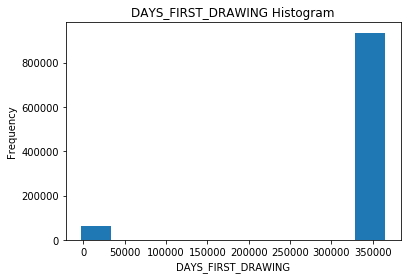

In [15]:
previous_application['DAYS_FIRST_DRAWING'].plot.hist(title = 'DAYS_FIRST_DRAWING Histogram');
plt.xlabel('DAYS_FIRST_DRAWING')

Text(0.5, 0, 'DAYS_FIRST_DUE')

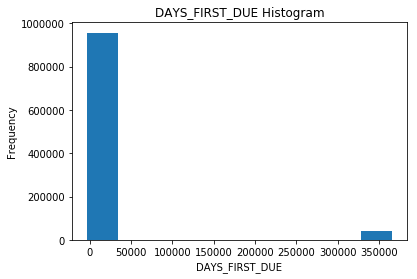

In [16]:
previous_application['DAYS_FIRST_DUE'].plot.hist(title = 'DAYS_FIRST_DUE Histogram');
plt.xlabel('DAYS_FIRST_DUE')

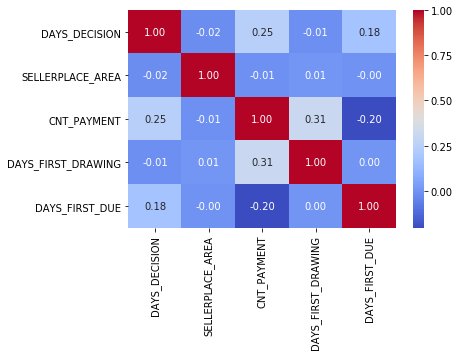

In [17]:
g = sns.heatmap(previous_application[['DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'DAYS_LAST_DUE_1ST_VERSION')

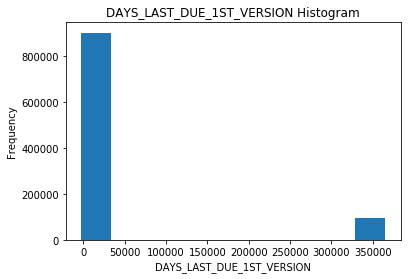

In [18]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].plot.hist(title = 'DAYS_LAST_DUE_1ST_VERSION Histogram');
plt.xlabel('DAYS_LAST_DUE_1ST_VERSION')





Text(0.5, 0, 'DAYS_TERMINATION')

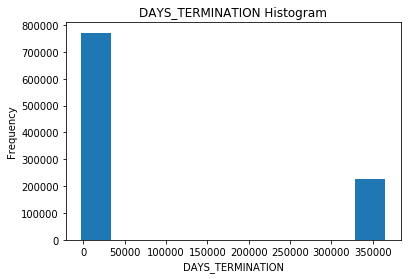

In [19]:
previous_application['DAYS_TERMINATION'].plot.hist(title = 'DAYS_TERMINATION Histogram');
plt.xlabel('DAYS_TERMINATION')

Text(0.5, 0, 'NFLAG_INSURED_ON_APPROVAL')

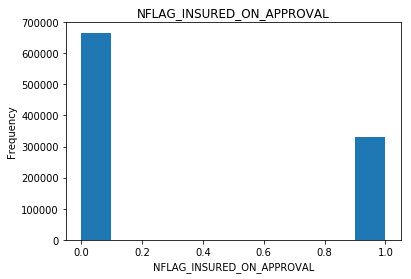

In [20]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].plot.hist(title = 'NFLAG_INSURED_ON_APPROVAL');
plt.xlabel('NFLAG_INSURED_ON_APPROVAL')

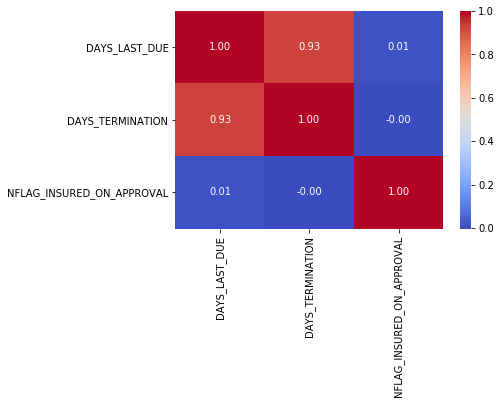

In [21]:
g = sns.heatmap(previous_application[['DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 1.0, 'customer Down Payment Distribution')

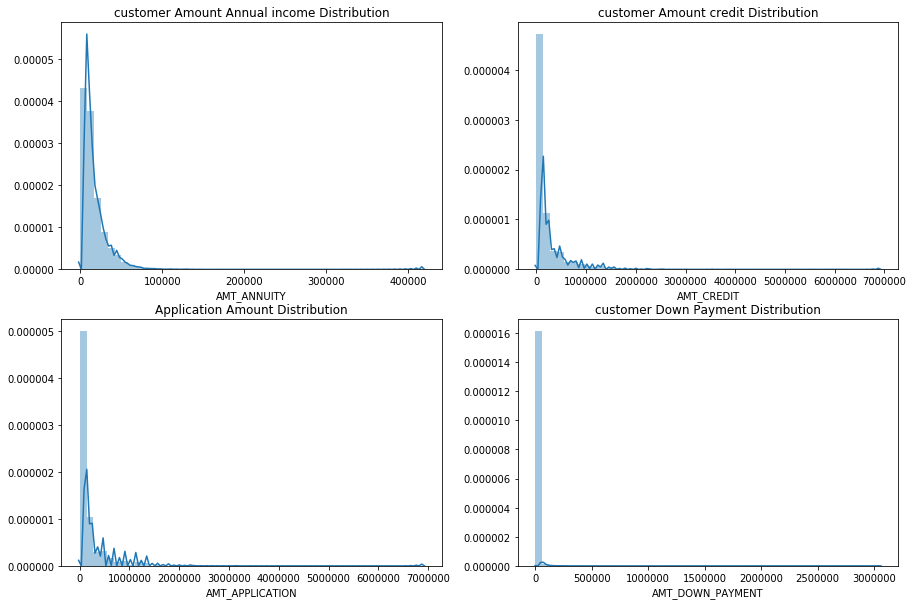

In [22]:


f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(previous_application.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(previous_application.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(previous_application.AMT_APPLICATION.dropna(), kde=True, ax=ax[1,0]).set_title('Application Amount Distribution')
sns.distplot(previous_application.AMT_DOWN_PAYMENT.dropna(), kde=True, ax=ax[1,1]).set_title('customer Down Payment Distribution')




correlation of these

Now i am typing column groups and od same analysis like we have done in applicaton_data

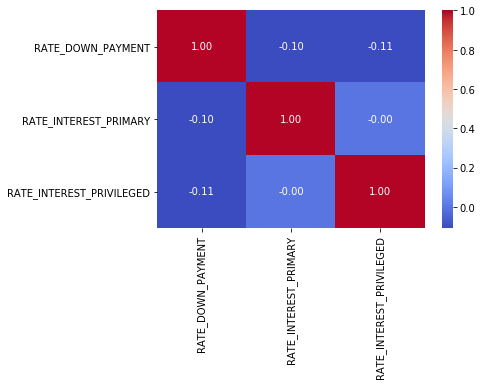

In [23]:


g = sns.heatmap(previous_application[['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


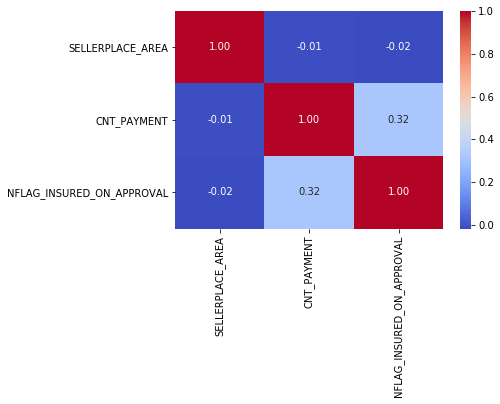

In [24]:

g = sns.heatmap(previous_application[['SELLERPLACE_AREA','CNT_PAYMENT','NFLAG_INSURED_ON_APPROVAL']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


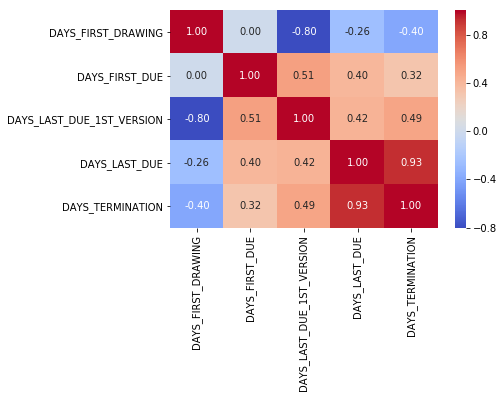

In [25]:
g = sns.heatmap(previous_application[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
